<a href="https://colab.research.google.com/github/maheswarankannan/AIML/blob/main/USATweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project - Twitter US Airline Sentiment



Context: Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

Data Description: A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

Dataset:

The dataset has the following columns:
- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

## 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)


In [98]:
# Contractions is text procession prodedure for cleaning the text in to presentable 
!pip install contractions

Notes: Contractions are or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

In [99]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [100]:
import pandas as pd                                                 # Import Pandas
import seaborn as sns                                               # Import Seaborn
import matplotlib.pyplot as plt                                     # Import matplot librarary
# plt.style.use("dark_background")
# sns.set_palette("dark")
import numpy as np                                                  # Import Numpy
import warnings                                                     # Import Warnings
warnings.filterwarnings('ignore')


from sklearn.feature_extraction.text import TfidfVectorizer         # Import TFIDFVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer         # Import CountVectorizer from sklearn

from sklearn.metrics import classification_report, confusion_matrix   # Import Confusion matrix
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score # Import ROC Curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split                  # Import train and test split
from sklearn.naive_bayes import GaussianNB                            # Import Naive bayes supervised algoritham
from sklearn.model_selection import StratifiedKFold                   # Import K Fold Cross validation

In [101]:
# Mount and connect google drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Load Tweets.csv file for analysis and check the shape
airtweets=pd.read_csv("/content/drive/My Drive/Tweets.csv")
airtweets.shape

(14640, 15)

#2. Understand of data-columns: (5 Marks)
##     - a. Drop all other columns except “text” and “airline_sentiment”.
##     - b. Check the shape of the data.
##     - c. Print the first 5 rows of data.

In [103]:
# Check the data set first five rows including column names
airtweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Data Description:

 - 1.tweet_id : ID of tweet

 - 2.airline_sentiment : The sentiment of tweet. It can be positive or negative or neutral

 - 5.text : contents of tweet

For the purpose of this assignments "airline_sentiment" and "text" data columns are important and other columns can be dropped. Also will use twitter_id to eliminate the duplicates so that will get good predective scores. After removing duplicates tweet_id has to be dropped.

In [104]:
# Finding and Removing Duplicates
duplicateDFRow = airtweets[airtweets.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(72, 15)

Notes: There are 72 duplicate rows hence those rows can be deleted and will keep the first data row

In [105]:
duplicateDFRow.head(6)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12001,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12162,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11998,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11997,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12158,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)


In [106]:
#removing duplicates
airtweets.drop_duplicates(keep='first',inplace=True)
duplicateDFRow = airtweets[airtweets.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape[0]

0

In [107]:
airtweets.shape

(14604, 15)

Notes: After removing duplicates there are 14604 rows remaining

Drop all other columns except “text” and “airline_sentiment”.

In [108]:
# new Dataframe with selected features
nairtweets=airtweets[['tweet_id','airline_sentiment','text']]
nairtweets.head()

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...


Notes: selective features been copied to new data frame "nairtweets"

In [109]:
nairtweets.shape

(14604, 3)

In [110]:
#Check Duplicates on twitter_id
duplicateDFRow = nairtweets[nairtweets.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(202, 3)

Notes: There are 202 rows duplicte based on twitter_id hence those rows has been deleted

In [111]:
# Removing duplicates
nairtweets.drop_duplicates(keep='first',inplace=True)
duplicateDFRow = nairtweets[nairtweets.duplicated(keep=False)]
duplicateDFRow.shape[0]

0

In [112]:
nairtweets.shape

(14503, 3)

Notes: Finally we got 14503 unique rows after removing  duplicates

In [113]:
nairtweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14503 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14503 non-null  int64 
 1   airline_sentiment  14503 non-null  object
 2   text               14503 non-null  object
dtypes: int64(1), object(2)
memory usage: 453.2+ KB


In [114]:
nairtweets.head()

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...


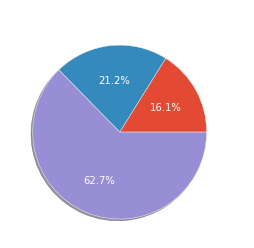

In [115]:
# For the purpose of understanding the % of sentiment been plotted in graph
ST = nairtweets.groupby('airline_sentiment').agg('count')
plt.pie(ST.tweet_id.sort_values(), labels=ST.tweet_id.sort_values().index,autopct='%1.1f%%', shadow=True )
plt.title("Pi Chart of Sentiments of twitts")
plt.show()

Observations:
 - 1.There are 63% of negative sentiments than positve and neutral combined
 - 2.Neutral sentiments are around 21% than positive sentiments 16%

In [116]:
# drop tweet id
nairtweets=nairtweets[['airline_sentiment','text']]
nairtweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Notes: Finally we dropped twitter_id and keep "airline_sentiment" and "text" columns for the purpose of our analysis

#3. Text pre-processing: Data preparation. (16 Marks)
###NOTE:- Each text pre-processing steps should be mentioned in the notebook separately.
###     - a. Html tag removal.
###     - b. Tokenization.
###     - c. Remove the numbers.
###     - d. Removal of Special Characters and Punctuations.
###     - e. Conversion to lowercase.
###     - f. Lemmatize or stemming.
###     - g. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
###     - h. Print the first 5 rows of data after pre-processing.


- Removing HTML Tags from "text"

In [117]:
#Remove html tags
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

nairtweets['text'] = nairtweets['text'].apply(lambda x: strip_html(x))
nairtweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


 - Removing accented charactors from "text"

In [118]:
#remove accented characters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

nairtweets['text'] = nairtweets['text'].apply(lambda x: remove_accented_chars(x))
nairtweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


 - Removing Special Charactors "text"

In [119]:
#remove special characters
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

nairtweets['text'] = nairtweets['text'].apply(lambda x: remove_special_characters(x,remove_digits=True))
nairtweets.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus youve added commercials to ...
2,neutral,VirginAmerica I didnt today Must mean I need t...
3,negative,VirginAmerica its really aggressive to blast o...
4,negative,VirginAmerica and its a really big bad thing a...


 - Replacing Contractions from "text"

In [120]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

nairtweets['text'] = nairtweets['text'].apply(lambda x: replace_contractions(x))
nairtweets.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials ...
2,neutral,VirginAmerica I did not today Must mean I need...
3,negative,VirginAmerica its really aggressive to blast o...
4,negative,VirginAmerica and its a really big bad thing a...


 - Removing Numbers from "text"

In [121]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

nairtweets['text'] = nairtweets['text'].apply(lambda x: remove_numbers(x))
nairtweets.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials ...
2,neutral,VirginAmerica I did not today Must mean I need...
3,negative,VirginAmerica its really aggressive to blast o...
4,negative,VirginAmerica and its a really big bad thing a...


 - Tokenization of "text"

In [122]:
nairtweets['text']  = nairtweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data


In [123]:
nairtweets.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commer..."
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean..."
3,negative,"[VirginAmerica, its, really, aggressive, to, b..."
4,negative,"[VirginAmerica, and, its, a, really, big, bad,..."


 - Printing list of stop words in English

In [124]:
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

 - Creating custom list of stop words for better results in sentiment analysis

In [125]:
stopwords = nltk.corpus.stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 
print(stopwords)

['under', 'been', 'as', 'but', 'does', 'himself', 'whom', 'your', 'for', 'he', 'that', 'most', 'herself', "that'll", 'were', "it's", 'by', 'how', 'was', 're', 'they', 'what', 'all', 'can', 'than', 'yourself', 'out', 'such', 'both', 'you', 'him', 'few', 'when', 'there', 'only', 'having', 'she', 'further', 'did', 'other', 'our', 'themselves', 'yours', "you'd", 'which', 'where', 'with', 'ain', 'same', 'hers', 'these', 'have', "you're", 'after', 'now', 't', 'just', 'while', 'some', 'no', 'who', 'through', 'in', 'a', 'too', 'an', 'o', 'ours', 'we', 'from', 'very', 'doing', 'am', 'those', 'her', 'then', 'if', 'more', 'me', 'between', 'it', 'over', 've', 'its', 'the', 'above', 'should', 'during', 'do', 'why', 'yourselves', 'being', 'at', 'this', 'y', "aren't", 's', 'before', 'own', 'my', 'ourselves', 'm', 'because', 'd', "she's", 'up', 'down', 'theirs', 'has', 'of', 'into', 'here', 'their', "you'll", 'had', 'to', "should've", 'below', 'again', 'll', 'until', 'off', 'once', 'couldn', 'will', '

 - For this analysis we are not using streeming and we are using lemmatizer

In [126]:
#stemming
#def simple_stemmer(text):
#    ps = nltk.porter.PorterStemmer()
#    text = ' '.join([ps.stem(word) for word in text.split()])
#    return text

#nairtweets['text'] = nairtweets['text'].apply(lambda x: simple_stemmer(x))
#nairtweets.head()


 - Application of Lemmatizer: This Includes following
    - remove non ascii words
    - making lower case
    - Remove Punctuation
    - Remove stop words
    - Lemmatize List words
    - Normalize words
    - Finally join all in to source columne

In [127]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

nairtweets['text'] = nairtweets.apply(lambda row: normalize(row['text']), axis=1)
nairtweets.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


Business assumption: For the purpose of this analysis we will consider all neutral sentiments are positive. This will not affect to analyse negative sentiments and will focus more on negative sentiments indepth.

In [128]:
# Merge neutral and positive sentiments in one category
nairtweets['airline_sentiment']=nairtweets['airline_sentiment'].str.replace('neutral','positive')

Convert Data lables in to numeric:
 - 1 for negative tweets
 - 0 for positive and neutral tweets

In [129]:
# convert class label into numerical number
# 1 is used for negative tweets so that it will reflect in recall score
nairtweets['airline_sentiment'].replace(to_replace='positive', value=0, inplace=True)
nairtweets['airline_sentiment'].replace(to_replace='negative', value=1, inplace=True)
nairtweets.head()

,airline_sentiment,text
0,0,virginamerica dhepburn say
1,0,virginamerica plus add commercials experience ...
2,0,virginamerica not today must mean need take an...
3,1,virginamerica really aggressive blast obnoxiou...
4,1,virginamerica really big bad thing


Checking any null values

In [130]:
# Checking null values
nairtweets[nairtweets['text'].isna()]


,airline_sentiment,text


Exploring number of times each word has been used in to complete documnets

In [131]:
txt = ' '.join(nairtweets['text'])
txt=txt.split()
freq_cnt = pd.Series(txt).value_counts()
type(freq_cnt)

pandas.core.series.Series

In [132]:
freq_DF = freq_cnt.to_frame()

Least word counts:

In [133]:
freq_DF.tail()

,0
sinuses,1
midterm,1
tux,1
publish,1
engagements,1


Top highest word counts:

In [134]:
freq=nairtweets['text'].str.split(expand=True).stack().value_counts().to_frame()
freq.rename(columns = {0:'count'}, inplace = True) 
   
freq.head()

,count
flight,4757
unite,4152
not,3837
usairways,3043
americanair,2819


Printing word counts:

In [135]:
print("Total number of words in Corpus are ",freq['count'].sum())

Total number of words in Corpus are  144859


In [136]:
print("Total number of words that has appeared more than 3000 times in Corpus are ",freq.loc[freq['count']>3000].shape[0])
print("Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are ",freq.loc[freq['count']<=3000].loc[freq['count']>2500].shape[0])
print("Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are ",freq.loc[freq['count']<=2500].loc[freq['count']>2000].shape[0])
print("Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are ",freq.loc[freq['count']<=2000].loc[freq['count']>1500].shape[0])
print("Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are ",freq.loc[freq['count']<=1500].loc[freq['count']>1000].shape[0])
print("Total number of words that has appeared less than 1000 times and more than 500 times in Corpus are ",freq.loc[freq['count']<=1000].loc[freq['count']>500].shape[0])
print("Total number of words that has appeared less than 500 times and more than 400 times in Corpus are ",freq.loc[freq['count']<=500].loc[freq['count']>400].shape[0])
print("Total number of words that has appeared less than 400 times and more than 300 times in Corpus are ",freq.loc[freq['count']<=400].loc[freq['count']>300].shape[0])
print("Total number of words that has appeared less than 300 times and more than 200 times in Corpus are ",freq.loc[freq['count']<=300].loc[freq['count']>200].shape[0])
print("Total number of words that has appeared less than 200 times and more than 100 times in Corpus are ",freq.loc[freq['count']<=200].loc[freq['count']>100].shape[0])
print("Total number of words that has appeared less than 100 times and more than 50 times in Corpus are ",freq.loc[freq['count']<=100].loc[freq['count']>50].shape[0])
print("Total number of words that has appeared less than 50 times and more than 25 times in Corpus are ",freq.loc[freq['count']<=50].loc[freq['count']>25].shape[0])
print("Total number of words that has appeared less than 25 times and more than 15 times in Corpus are ",freq.loc[freq['count']<=25].loc[freq['count']>15].shape[0])
print("Total number of words that has appeared less than 15 times and more than 10 times in Corpus are ",freq.loc[freq['count']<=15].loc[freq['count']>10].shape[0])
print("Total number of words that has appeared less than 10 times and more than 5 times in Corpus are ",freq.loc[freq['count']<=10].loc[freq['count']>5].shape[0])
print("Total number of words that has appeared less than 5 times and more than 3 times in Corpus are ",freq.loc[freq['count']<=5].loc[freq['count']>3].shape[0])
print("Total number of words that has appeared 3 times in Corpus are ",freq.loc[freq['count']==3].shape[0])
print("Total number of words that has appeared 2 times in Corpus are ",freq.loc[freq['count']==2].shape[0])
print("Total number of words that has appeared 1 times in Corpus are ",freq.loc[freq['count']==1].shape[0])


Total number of words that has appeared more than 3000 times in Corpus are  4
Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are  1
Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are  3
Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are  1
Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are  1
Total number of words that has appeared less than 1000 times and more than 500 times in Corpus are  26
Total number of words that has appeared less than 500 times and more than 400 times in Corpus are  14
Total number of words that has appeared less than 400 times and more than 300 times in Corpus are  23
Total number of words that has appeared less than 300 times and more than 200 times in Corpus are  42
Total number of words that has appeared less than 200 times and more than 100 times in Corpus are  12

Wordcloud : Visualizing positive and negative sentiment words

In [137]:
text = " ".join(review for review in nairtweets['text'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 982727 words in the combination of all review.


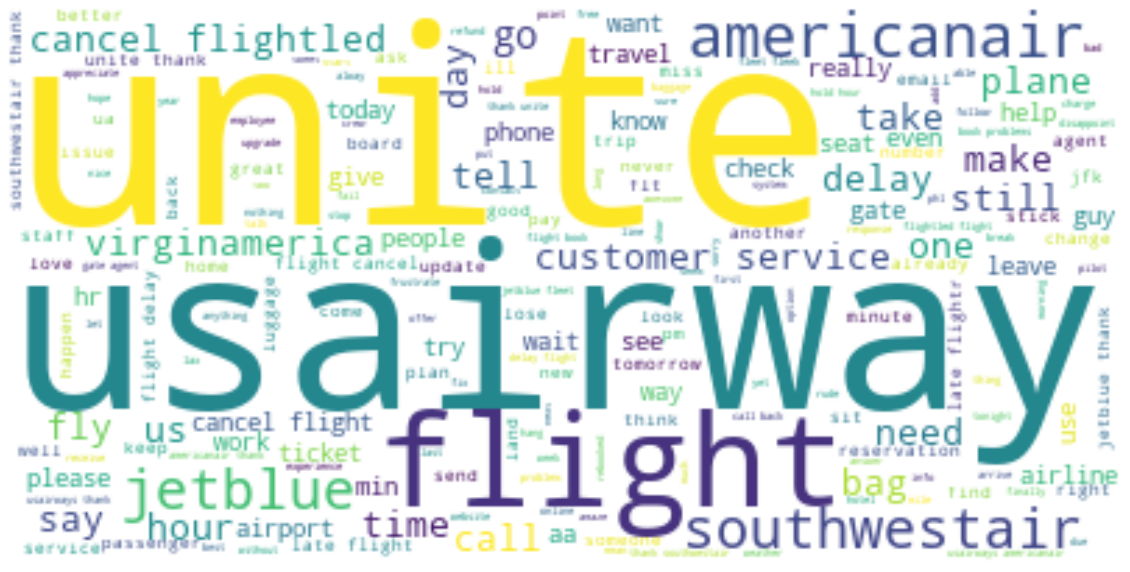

In [138]:
from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud for records with negative sentiment




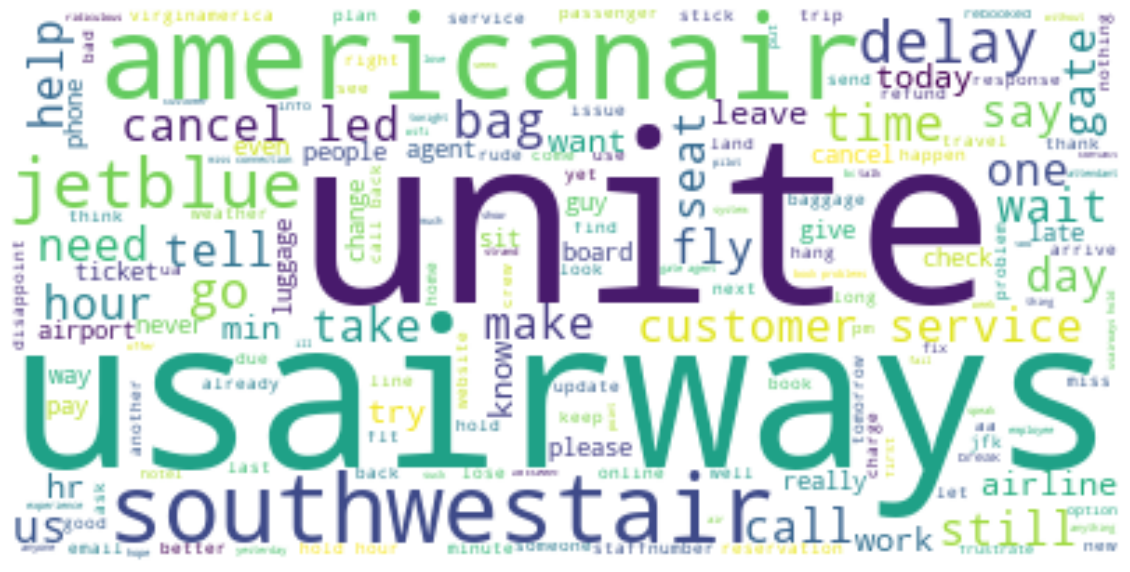

In [139]:
#negative cloud
textNeg = " ".join(review for review in nairtweets['text'].loc[nairtweets['airline_sentiment']==1])
textNeg=textNeg.replace('flight', '')
textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud for records with Positive sentiment

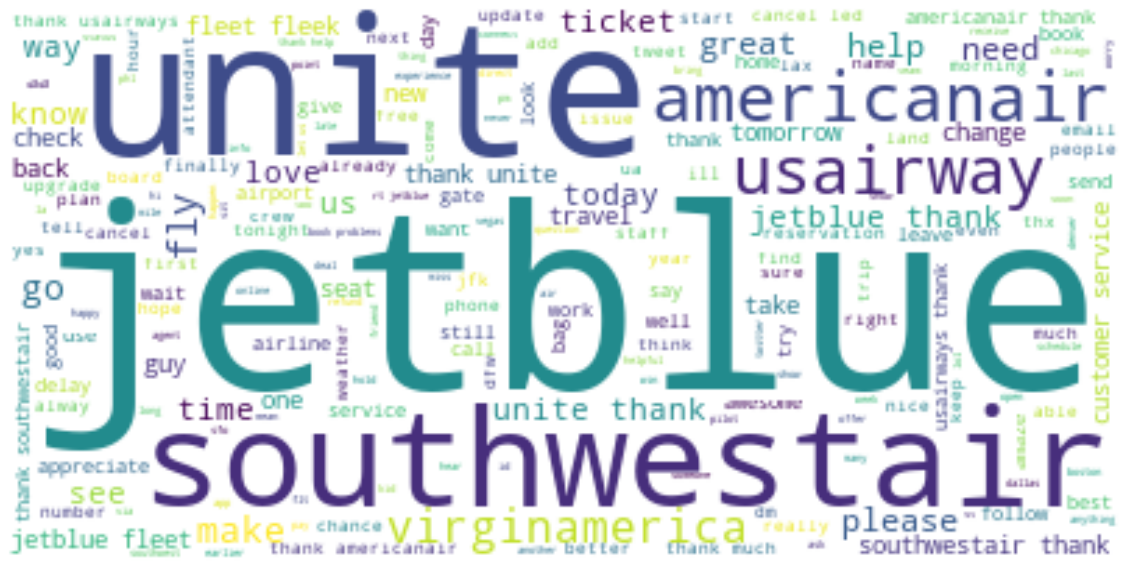

In [140]:
#negative cloud
textNeg = " ".join(review for review in nairtweets['text'].loc[nairtweets['airline_sentiment']==0])
textNeg=textNeg.replace('flight', '')
textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Vectorization: (10 Marks)
##    - a. Use CountVectorizer.
##    - b. Use TfidfVectorizer.


Using CountVectorizer

Here we are used CountVectorizer to count the number of times a word occurs in corpus.This will convert the text vectors as a model to process only numerical data. This will result in biasing in favour of most frequent words.

In [141]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(nairtweets['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [142]:
data_features.shape

(14503, 1000)

In [143]:
labels = nairtweets['airline_sentiment']
labels = labels.astype('int')

In [144]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [145]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7532898595498942


In [146]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[1135  432]
 [ 479 2305]]


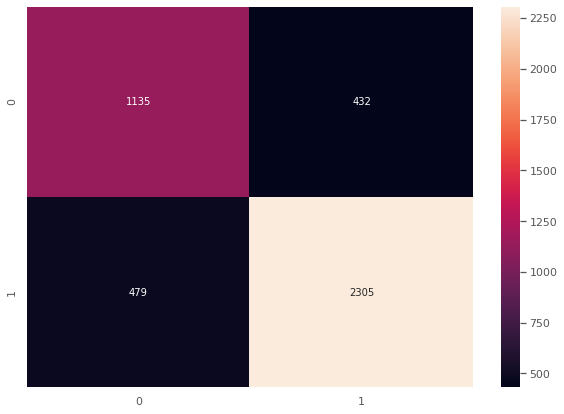

In [147]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Using TfidfVectorizer

Here we have used TFIDFVectorizer this will consider overall document weightage of words.This used to penalize frequent words.

In [148]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(nairtweets['text'])

data_features = data_features.toarray()

data_features.shape

(14503, 1000)

In [149]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [150]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7600467691722712


In [151]:
result = forest.predict(X_test)

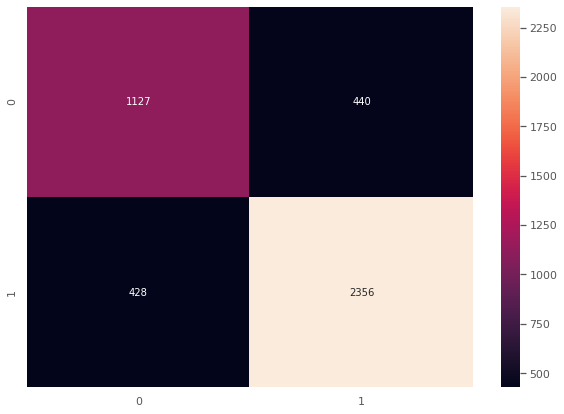

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Best so far Observations:

1.Recall score ---> CountVecctorizer:0.7532, TFIDFVectorizer:0.7600

2.CountVectorisr and TFIDFVectorizer models are overfitting at a extent

## 5. Fit and evaluate the model using both types of vectorization. (6+6 Marks) and building ROC curve

Split Dataset as x , y

In [153]:
y = nairtweets['airline_sentiment'].values
X = nairtweets[['text']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

Application of CountVectorizer with Naive Bayes Algoritham to evaluate the prediction scores:

In [154]:
# Getting BOW 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

vectorizer = CountVectorizer(min_df=2,ngram_range=(1,4))
vectorizer.fit(X_train['text'])
X_train_bow = vectorizer.transform(X_train['text'].values)
X_test_bow = vectorizer.transform(X_test['text'].values)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

(10152, 1) (10152,)
(4351, 1) (4351,)
After vectorizations
(10152, 16839) (10152,)
(4351, 16839) (4351,)


In [155]:
X_train_bow.shape

(10152, 16839)

In [156]:
X_train_bow=X_train_bow.toarray()
X_test_bow=X_test_bow.toarray()

In [157]:
gnb = GaussianNB()
gnb.fit(X_train_bow, y_train)
pred = gnb.predict(X_test_bow)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test_bow)
aucScoreBOW = roc_auc_score(y_test,  y_pred_prob[:,1])
fprBOW, tprBOW, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreBOW)
predT=gnb.predict(X_train_bow)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))

Confusion matrix
[[1218  406]
 [ 705 2022]]
              precision    recall  f1-score   support

           0       0.63      0.75      0.69      1624
           1       0.83      0.74      0.78      2727

    accuracy                           0.74      4351
   macro avg       0.73      0.75      0.74      4351
weighted avg       0.76      0.74      0.75      4351

AUC score for NB is  0.7457370737073707
Train Recall score for NB is  0.913234831813895
Test Recall score for NB is  0.7414741474147415


Observations:

 - 1.The test score of 0.7414 is fairly good

 - 2.But the model seems quite overfitting

Application of TFIDFVectorizer with Naive Bayes Algoritham to evaluate the prediction scores:

In [158]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)
vectorizer = TfidfVectorizer(min_df=2,ngram_range=(1,4))
vectorizer.fit(X_train['text'])
X_train_tfidf = vectorizer.transform(X_train['text'].values)
X_test_tfidf = vectorizer.transform(X_test['text'].values)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

(10152, 1) (10152,)
(4351, 1) (4351,)
After vectorizations
(10152, 16839) (10152,)
(4351, 16839) (4351,)


In [159]:
X_train_tfidf=X_train_tfidf.toarray()
X_test_tfidf=X_test_tfidf.toarray()

In [160]:
gnb = GaussianNB()
gnb.fit(X_train_tfidf, y_train)
pred = gnb.predict(X_test_tfidf)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test_tfidf)
aucScoreTFIDF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprTFIDF, tprTFIDF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreTFIDF)
#print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train_tfidf)
#print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))

Confusion matrix
[[1198  426]
 [ 695 2032]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1624
           1       0.83      0.75      0.78      2727

    accuracy                           0.74      4351
   macro avg       0.73      0.74      0.73      4351
weighted avg       0.75      0.74      0.75      4351

AUC score for NB is  0.7414129549243922
Train Recall score for NB is  0.913234831813895
Test Recall score for NB is  0.7451411807847451


Observations:

 - 1.The test score of 0.7451 is fairly good

 - 2.It is very close to result of BOW

 - 3.This model is also seems quite overfitting

 - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes

ROC Curve

In [161]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table=result_table.append({'classifiers':"Naive Bayer with BOW",'fpr':fprBOW,'tpr':tprBOW,'auc':aucScoreBOW}, ignore_index=True)
result_table=result_table.append({'classifiers':"Naive Bayer with TFIDF",'fpr':fprTFIDF,'tpr':tprTFIDF,'auc':aucScoreTFIDF}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)

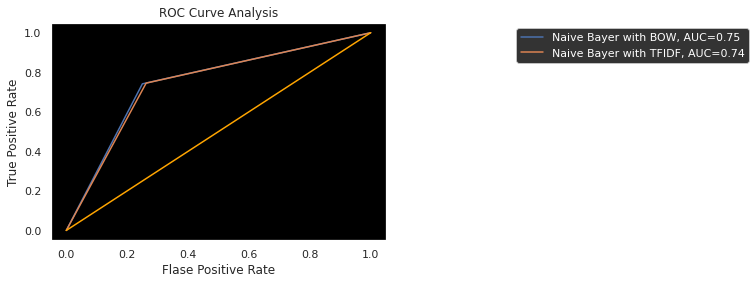

In [162]:
sns.set()
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))

#fig = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(False)

plt.style.use("dark_background")
plt.plot([0,1], [0,1], color='orange')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve Analysis')
plt.legend(bbox_to_anchor=(2.1, 1), loc='upper right')
plt.show()

Best so far Observations using NB:

1.Recall score ---> BOW:0.75, TFIDF:0.74

2.BOW and TFIDF models are overfitting at small extent


# 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

Summary:

 - We used dataset which has reviews in text format and their sentiment score on the scale of 0 to 1.
    - 0 for positive and neutral sentiment
    - 1 for negative sentiment
 - The goal was to build a model for text-classification according to sclale either positive or negative.
 - We Pre-processed the data using variuos techniques and libraries.
 - The pre-precessed data is converted to numbers, so that we can feed the data in the model.
 - After building the classification model, we predicted the result for the test data.
 - After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
 - However, we can still expedict the accuracy of our model by increasing number of features(used 1000 due to time constraint) we took into account for the model building 
 - After removing duplicates we used approximately 14503 entries out of around 14604 entries, which means we built our model using 99.3% of dataset.
 - One more way to increase accuracy is to use different variations of Pre-processing techniques.

 - For our tweet analysis setting n-gram ranges that use bigrams or trigrams can stratergically inprove the classification as that captured most complex expressions formed by the composition of more than one word. The outcome depends on not only the frequency of words also the combination of words stating a sentiment meeting.

 - According to model tuning TF-IDF (stands for Term-Frequency-Inverse-Document Frequency) weights down the common words occuring in almost all the documents and give more importance to the words that appear in a subset of documents. 
 
  - It is very clear that TF-IDF works by penalising these common words by assigning them lower weights while giving importance to some rare words in a particular document.

#Conclusion and future extension of analysis:

This is a simple tweet classification on text messages as positive tweet or negative tweet using some basic natural language processing and then building a model using CountVectorizer and TFIDFVectorizer and naive bayes algoritham text classifier. Application of WordCloud on confusion matrix by printing true positive vs true positive most frequent words will give an bench mark for posive words in feed back tweets also printing WordCloud for true negative vs. true negative most frequent words will give behchmark for negative words in feedback tweets. Based on confusion matrix results we can drive business impact and exploratory business scenario's can be visualised to managment.

#Appendix: Using relu sigmoid

In [163]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
from sklearn import metrics


# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec

from tensorflow.keras import Sequential
from tensorflow.keras import layers


In [164]:
x = nairtweets['text'].values
y = nairtweets['airline_sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
count_vectorizer = CountVectorizer()
x_train_bow = count_vectorizer.fit_transform(x_train)
x_test_bow = count_vectorizer.transform(x_test)

input_dim = x_train_bow.shape[1]

model = Sequential()
model.add(layers.Dense(6, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [165]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 63612     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 63,619
Trainable params: 63,619
Non-trainable params: 0
_________________________________________________________________


In [166]:
import scipy

x_train_bow.sort_indices()
x_test_bow.sort_indices()
history = model.fit(x_train_bow, y_train, epochs=100, batch_size=10, validation_data=(x_test_bow, y_test), verbose=False)

In [167]:
loss, accuracy = model.evaluate(x_train_bow, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test_bow, y_test, verbose=False)
print("Test Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9988
Test Accuracy: 0.7532


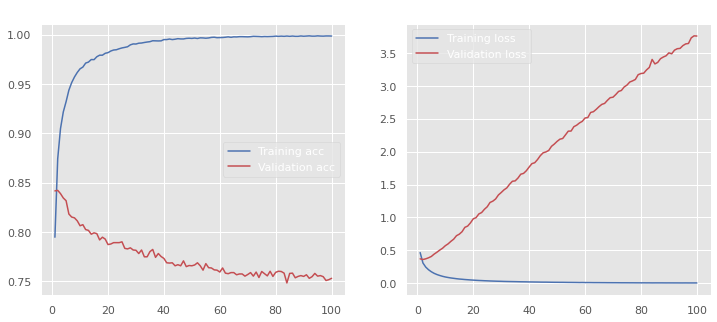

In [168]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)


Observation:
 - Training Accuracy obtained 99%
 - Testing accuracy at 75% which actually depriciating validation accuracy at lower trend